# YOLO v11 Object Detection Tutorial

This notebook provides a comprehensive guide to using YOLO v11 for object detection tasks. YOLO (You Only Look Once) is a popular real-time object detection system, and v11 represents the latest advancement in the architecture with improved accuracy and speed.

## Contents
1. Installation and Setup
2. Loading the Model
3. Processing Images
4. Processing Video


## 1. Installation and Setup

First, let's install the necessary dependencies. YOLO v11 requires PyTorch, OpenCV, and other libraries.

In [10]:
# # Install dependencies
# !pip install torch torchvision torchaudio
# !pip install opencv-python
# !pip install ultralytics  # Latest package that includes YOLO v11
# !pip install matplotlib seaborn pandas

Let's import the necessary libraries:

In [11]:
import torch

import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import os
import pandas as pd
import seaborn as sns

# Check if CUDA is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

# Set plotting style
plt.style.use('fivethirtyeight')
%matplotlib inline

CUDA available: True
CUDA device: NVIDIA GeForce RTX 3050 Laptop GPU


## 2. Loading the Model

YOLO v11 offers several model sizes to balance between speed and accuracy. Let's explore the available models and load our preferred version.

In [12]:
# List available YOLO v11 models
models = [
    'yolov11n',  # Nano - Smallest and fastest
    'yolov11s',  # Small
    'yolov11m',  # Medium
    'yolov11l',  # Large
    'yolov11x'   # Extra Large - Most accurate
]

print("Available YOLOv11 models:")
for i, model in enumerate(models):
    print(f"{i+1}. {model}")

Available YOLOv11 models:
1. yolov11n
2. yolov11s
3. yolov11m
4. yolov11l
5. yolov11x


In [13]:
from ultralytics import YOLO

# Load the YOLOv11 model
# Download link: https://docs.ultralytics.com/tasks/detect/
model = YOLO('/home/tang/FRA532_objectdetechtion/TrackingTask/yolo11n.pt')

# Display model information
print(f"Model: {model.model_name}")
print(f"Task: {model.task}")
print(f"Classes: {len(model.names)}")
print("Class names sample:", list(model.names.values())[:10])

Model: /home/tang/FRA532_objectdetechtion/TrackingTask/yolo11n.pt
Task: detect
Classes: 80
Class names sample: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']


## 3. Processing Images

Now let's use our model to detect objects in images. We'll demonstrate with a sample image.

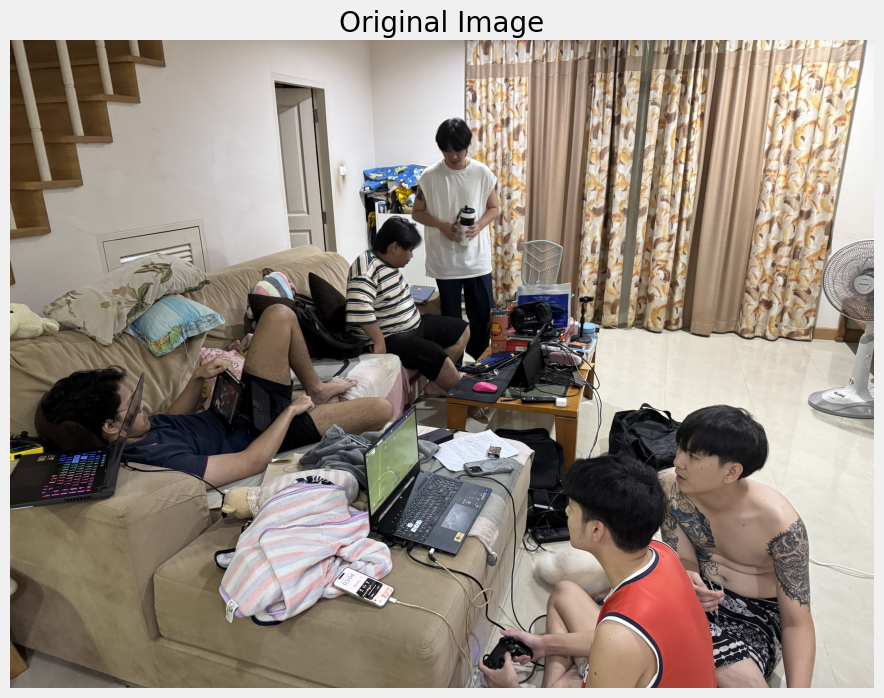

In [14]:
import cv2
import matplotlib.pyplot as plt
# Load the testing image
image_path = '/home/tang/FRA532_objectdetechtion/TrackingTask/IMG_2922.JPG'

# Display the original image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [15]:
# Perform object detection
results = model(img_rgb)

# Parse the results
result = results[0]  # Get the first result
boxes = result.boxes  # Get the bounding boxes

# Display detection information
print(f"Detected {len(boxes)} objects")

# Create a DataFrame to display detection details
detections = []
for i, box in enumerate(boxes):
    class_id = int(box.cls)
    class_name = model.names[class_id]
    confidence = float(box.conf)
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get box coordinates
    
    detections.append({
        'ID': i,
        'Class': class_name,
        'Confidence': f"{confidence:.2f}",
        'Coordinates': f"({int(x1)}, {int(y1)}, {int(x2)}, {int(y2)})"
    })

detections_df = pd.DataFrame(detections)
detections_df


0: 480x640 8 persons, 1 couch, 1 laptop, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Detected 10 objects


,ID,Class,Confidence,Coordinates
0,0,person,0.88,"(2644, 506, 3242, 2156)"
1,1,person,0.86,"(3098, 2739, 4693, 4281)"
2,2,person,0.86,"(4354, 2414, 5335, 4280)"
3,3,person,0.80,"(2223, 1165, 3031, 2362)"
4,4,couch,0.48,"(0, 1382, 2670, 2961)"
5,5,person,0.41,"(1504, 1522, 2588, 2647)"
6,6,person,0.36,"(1339, 2533, 3132, 4282)"
7,7,person,0.31,"(1516, 1534, 2294, 2591)"
8,8,person,0.30,"(5276, 1591, 5709, 2499)"
9,9,laptop,0.26,"(2388, 2785, 3213, 3399)"


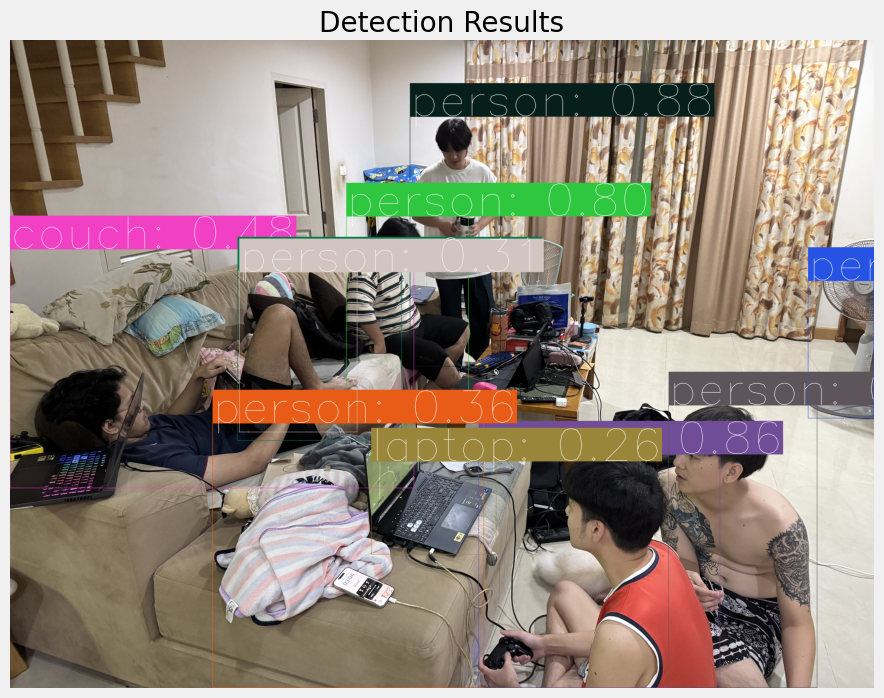

In [16]:
# Visualize the detection results
# Plot the image with bounding boxes and labels
def plot_results(image, boxes, names):
    img = image.copy()
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 10.0  # Bigger text
    font_thickness = 2

    for box in boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        
        # Get class and confidence
        class_id = int(box.cls)
        class_name = names[class_id]
        confidence = float(box.conf)
        
        # Create label text
        label = f"{class_name}: {confidence:.2f}"
        
        # Text size
        text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
        text_w, text_h = text_size

        # Color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        
        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)

        # Draw filled rectangle as text background
        cv2.rectangle(img, (x1, y1 - text_h - 10), (x1 + text_w, y1), color, thickness=-1)

        # Draw label text
        cv2.putText(img, label, (x1, y1 - 5), font, font_scale, (255, 255, 255), font_thickness, cv2.LINE_AA)
        
    return img


# Plot the results
result_img = plot_results(img_rgb, boxes, model.names)

plt.figure(figsize=(12, 8))
plt.imshow(result_img)
plt.title('Detection Results')
plt.axis('off')
plt.show()

## 4. Processing Video

YOLO v11 can also process video streams efficiently. Let's see how to apply our model to video content.

In [17]:
# # Define the path to your video file
# video_path = '/home/tang/FRA532_objectdetechtion/video/mavic_2_pro.mp4'

# # Create output folder
# output_folder = "detect_output2"
# os.makedirs(output_folder, exist_ok=True)

# # Create output video
# output_path = "detect_output2_video.mp4"


# # Function to process video
# def process_video(video_path, output_path=output_path, confidence=0.5, every_n_frames=1):
#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
    
#     # Get video properties
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = cap.get(cv2.CAP_PROP_FPS)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
#     # Create VideoWriter object
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
#     # Initialize counters
#     frame_count = 0
#     processed_count = 0
    
#     # Process the video
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         # Process every n-th frame to speed up processing
#         if frame_count % every_n_frames == 0:
#             # Convert frame from BGR to RGB
#             frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
#             # Perform detection
#             results = model(frame_rgb, conf=confidence)
            
#             # Get boxes
#             boxes = results[0].boxes
            
#             # Draw bounding boxes
#             processed_frame = plot_results(frame_rgb, boxes, model.names)
            
#             # Convert back to BGR for saving
#             processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_RGB2BGR)
#             processed_count += 1
#         else:
#             processed_frame = frame
        
#         # Save frame to output folder
#         frame_filename = os.path.join(output_folder, f"frame_{frame_count}.jpg")
#         cv2.imwrite(frame_filename, processed_frame)
        
#         # Write the frame
#         out.write(processed_frame)
        
#         # Update counter
#         frame_count += 1
        
#         # Print progress
#         if frame_count % 100 == 0:
#             print(f"Processed {frame_count}/{total_frames} frames ({frame_count/total_frames*100:.1f}%)")
    
#     # Release resources
#     cap.release()
#     out.release()
    
#     print(f"Video processing complete. Processed {processed_count} out of {frame_count} frames.")
#     print(f"Output saved to {output_path}")
    
#     return output_path

In [18]:
# Process a short clip of the video for demonstration
# This will process every 3rd frame to speed up processing
output_video = process_video(video_path, confidence=0.5, every_n_frames=3)

NameError: name 'process_video' is not defined